In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [74]:
import nltk
import string

In [179]:
df=pd.read_csv('final_db_2.csv')

In [38]:
df.head()

,author,comments,domain,flair,score,text,title,url
0,india_ko_vanakkam,"\nModi has Stockholm syndrome\nTo be fair, the...",self.india,AskIndia,91,> We are getting frantic calls from our pharma...,4 days ago we had pending orders of 100 millio...,https://www.reddit.com/r/india/comments/fwjdqr...
1,__knockknockturnal__,\nSomeone matched with me just to tell me that...,self.india,AskIndia,18,I'd my own stint with these apps(a couple of m...,Randians who were big time users of dating app...,https://www.reddit.com/r/india/comments/fizkkk...
2,Dev1003,\nI haven't found a Indian yet who believes ea...,self.india,AskIndia,6,"I encountered a Foreigner in IG who says "" Rou...",What does r/India thinks about the Flat Earthers?,https://www.reddit.com/r/india/comments/f25vx0...
3,c0mrade34,"\nAn Engineer, doing advertisement shoots sinc...",self.india,AskIndia,47,Couldn't add AskIndia flair from the mobile br...,People who left their 9 to 5 jobs to pursue a ...,https://www.reddit.com/r/india/comments/dtvliq...
4,amitkumarthakur,\nCalm down.\nGo to the SP office of your town...,self.india,AskIndia,96,"It's now 24hrs, But local police station is no...",Somebody want to kill my full family what to do?,https://www.reddit.com/r/india/comments/b7pvwt...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19916 entries, 0 to 19915
Data columns (total 8 columns):
author      19916 non-null object
comments    14686 non-null object
domain      19916 non-null object
flair       19916 non-null object
score       19916 non-null int64
text        7923 non-null object
title       19916 non-null object
url         19916 non-null object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


In [40]:
df.describe()

,score
count,19916.000000
mean,49.395662
std,337.359696
min,0.000000
25%,1.000000
50%,6.000000
75%,26.000000
max,17875.000000


In [41]:
df.groupby('flair').describe()

score                                                 \
                     count        mean         std  min  25%   50%    75%   
flair                                                                       
AskIndia            2442.0   32.074120  511.083303  0.0  1.0   5.0  16.00   
Business/Finance    2433.0   31.290588  109.141155  0.0  1.0   3.0  25.00   
Food                1273.0  107.946583  522.148341  0.0  1.0  11.0  59.00   
Non-Political       2416.0   28.803808   87.932854  0.0  1.0   5.0  21.00   
Photography          651.0   79.901690  303.400167  0.0  1.0   9.0  35.00   
Policy/Economy      2220.0   31.254054   82.185160  0.0  1.0   8.0  29.00   
Politics            2448.0   75.623366  346.734783  0.0  1.0   6.0  35.25   
Scheduled           1484.0   38.899596  125.743507  0.0  2.0   9.0  34.00   
Science/Technology  2117.0   50.529523  562.176246  0.0  1.0   5.0  25.00   
Sports              2432.0   62.121299  258.789378  0.0  1.0   4.0  23.00   

                             
                        max  
flair                        
AskIndia            17866.0  
Business/Finance     2622.0  
Food                10047.0  
Non-Political        1596.0  
Photography          3953.0  
Policy/Economy       2015.0  
Politics            11712.0  
Scheduled            2603.0  
Science/Technology  17875.0  
Sports               3542.0

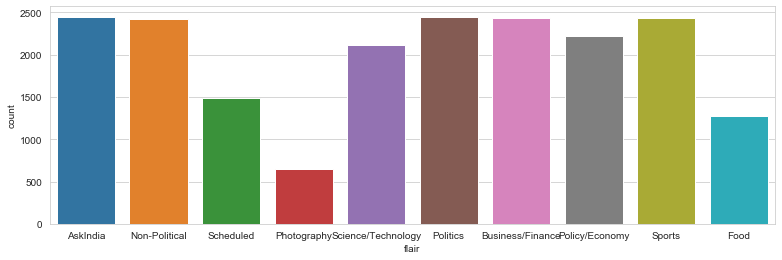

In [42]:
plt.figure(figsize=(13,4))
sns.countplot(x='flair',data=df)

In [68]:
type(df['text'][0])

str

In [169]:
def preprocess_text(txt):
    if type(txt)==str:
        nopunc = [str(char) for char in txt if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        return [ps.stem(word.lower()) for word in nopunc.split() if word.lower() not in nltk.corpus.stopwords.words('english')]

In [170]:
df['text']=df['text'].apply(preprocess_text)

In [78]:
df.head()

,author,comments,domain,flair,score,text,title,url
0,india_ko_vanakkam,"\nModi has Stockholm syndrome\nTo be fair, the...",self.india,AskIndia,91,"[get, frantic, call, pharma, custom, delay, ca...",4 days ago we had pending orders of 100 millio...,https://www.reddit.com/r/india/comments/fwjdqr...
1,__knockknockturnal__,\nSomeone matched with me just to tell me that...,self.india,AskIndia,18,"[id, stint, appsa, coupl, month, one, point, d...",Randians who were big time users of dating app...,https://www.reddit.com/r/india/comments/fizkkk...
2,Dev1003,\nI haven't found a Indian yet who believes ea...,self.india,AskIndia,6,"[encount, foreign, ig, say, round, earth, hoax...",What does r/India thinks about the Flat Earthers?,https://www.reddit.com/r/india/comments/f25vx0...
3,c0mrade34,"\nAn Engineer, doing advertisement shoots sinc...",self.india,AskIndia,47,"[couldnt, add, askindia, flair, mobil, browser]",People who left their 9 to 5 jobs to pursue a ...,https://www.reddit.com/r/india/comments/dtvliq...
4,amitkumarthakur,\nCalm down.\nGo to the SP office of your town...,self.india,AskIndia,96,"[24hr, local, polic, station, regist, case, do...",Somebody want to kill my full family what to do?,https://www.reddit.com/r/india/comments/b7pvwt...


In [171]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [112]:
from sklearn.model_selection import train_test_split
X=df['title']
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [119]:
X_train

16392    New realty law by May 1, set to cheer home buyers
6393       Weekly Photography Discussion Thread - 17/01/16
19424    India To Buy $60 Million Supercomputer To Pred...
6597                                        eli5 ddca scam
15468    Beautiful India (Day 8) : Agatti Island Airpor...
                               ...                        
1801     China's plans to build dams on rivers originat...
17302    70 to 2: What the Rio Olympics medal tally say...
6675                        [advice] Airtel's malpractices
7557     Anil Kumble named Team India head coach - Time...
18260    Full Stack Web Development - Where to start? •...
Name: title, Length: 13941, dtype: object

In [114]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess_text at 0x000002065F8D20D0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [115]:
predictions = pipeline.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix,classification_report

In [117]:
print(confusion_matrix(y_test,predictions))

[[511  51   3  36   0  30  33   3  19  23]
 [ 71 467   3  14   0  94  20   2  34  14]
 [ 92  23 148  30   0  29  25   1   5  13]
 [146  88   2 257   0  61 114   9  24  54]
 [ 61  13   1  27  28   2  12  25  14   4]
 [ 34 105   3  24   0 409  78   0  21  14]
 [ 29  17   3  39   0  59 551   0   4  26]
 [ 37  44   0  17   0   7  38 303  10  11]
 [110  97   0  36   0  53  34   0 292  21]
 [ 41  10   0  12   0   7  17   5  10 611]]


In [121]:
conf_matrix=confusion_matrix(y_test,predictions)

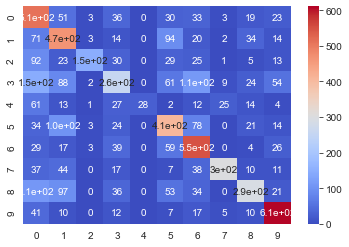

In [132]:
sns.heatmap(conf_matrix,annot=True,cmap='coolwarm')

In [126]:
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

          AskIndia       0.45      0.72      0.56       709
  Business/Finance       0.51      0.65      0.57       719
              Food       0.91      0.40      0.56       366
     Non-Political       0.52      0.34      0.41       755
       Photography       1.00      0.15      0.26       187
    Policy/Economy       0.54      0.59      0.57       688
          Politics       0.60      0.76      0.67       728
         Scheduled       0.87      0.65      0.74       467
Science/Technology       0.67      0.45      0.54       643
            Sports       0.77      0.86      0.81       713

          accuracy                           0.60      5975
         macro avg       0.69      0.56      0.57      5975
      weighted avg       0.64      0.60      0.59      5975



In [129]:
df.columns

Index(['author', 'comments', 'domain', 'flair', 'score', 'text', 'title',
       'url'],
      dtype='object')

In [180]:
to_probe=['text']
import pickle

to_probe ki list change karo aur upar 'text' ko prerocess mat karna




 This is for text 

[[525   4   0   0   0  70 136   1   2   2]
 [122  25   0   0   0  87 506   2   0   0]
 [ 90   0   1   0   0  28 228   0   0   0]
 [136   2   0   7   0  94 494   3   0   1]
 [ 65   0   0   0  20  10 108   3   0   0]
 [ 68   8   0   0   0 145 471   1   0   0]
 [ 79   0   0   0   0  66 558   0   0   0]
 [ 92  12   1   0   9  16 151 163   0   0]
 [123   1   0   0   0  83 444   0   4   0]
 [ 89   0   0   0   0  76 523   0   0  20]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.38      0.71      0.49       740
  Business/Finance       0.48      0.03      0.06       742
              Food       0.50      0.00      0.01       347
     Non-Political       1.00      0.01      0.02       737
       Photography       0.69      0.10      0.17       206
    Policy/Economy       0.21      0.21      0.21       693
          Politics       0.15      0.79      0.26       703
         Scheduled       0.94

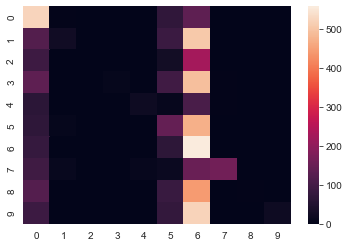

In [181]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("multinomial"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(y_test,predictions)

0.24569037656903767

0        > We are getting frantic calls from our pharma...
1        I'd my own stint with these apps(a couple of m...
2        I encountered a Foreigner in IG who says " Rou...
3        Couldn't add AskIndia flair from the mobile br...
4        It's now 24hrs, But local police station is no...
                               ...                        
19911    The glass in front of my wall clock broke. Whe...
19912    Hey Everyone, I am working as a data scientist...
19913    Let us use this thread to discuss games that w...
19914    Some reports claim that the company has closed...
19915    [Last week's issue - 08/02/2019](https://np.re...
Name: text, Length: 19916, dtype: object